In [34]:
import pandas as pd
import random
import numpy as np
import pickle
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import shap
import requests
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

filepath = os.path.abspath('')

In [30]:
data = pd.read_pickle(f'2003-2019_collective')

data = data.dropna()

In [106]:
y = data.iloc[:,-1]
X = data.iloc[:,3:-1]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   train_size = .8,
                                                   random_state = 69)

rf = RandomForestRegressor(n_estimators = 500, random_state = 69)
rf.fit(X_train, y_train)



RandomForestRegressor(n_estimators=500, random_state=69)

In [18]:
predictions = rf.predict(X_test)

errors = abs(predictions - y_test)

errors.mean()



0.35494570135746606

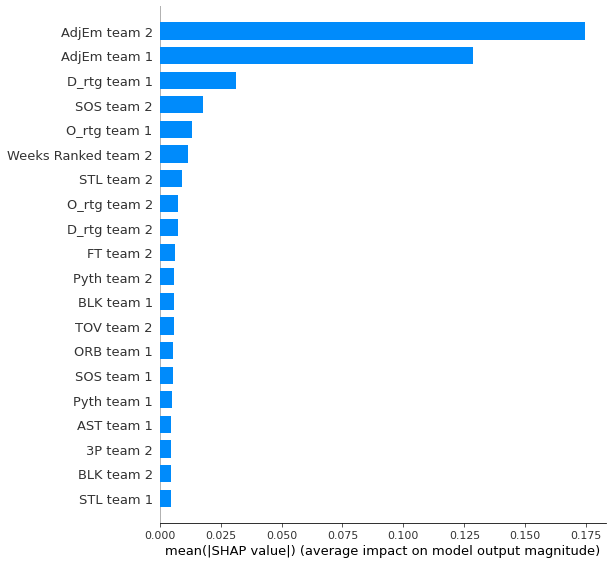

In [19]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap_values
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [29]:
subtract = pd.read_pickle(f'2003-2019_subtracting_frame').dropna()
pickle.dump(subtract,open(os.path.join(filepath, '2003-2019_subtracting_frame'),'wb'))

subtract.to_excel('subtracted_data_2003-2019.xlsx')
subtract

,Year,Team 1,Team 2,2P,3P,3P%,FT,ORB,TRB,AST,...,PF,PTS,PA,SOS,Pyth,Weeks Ranked,AdjEm,O_rtg,D_rtg,Win
0,2003,UNC Asheville,TX Southern,-0.3,0.5,0.031,-1.5,-1.0,-2.5,-0.9,...,0.9,-0.7,7.1,5.60,-0.387062,0,-1.90,2.9,4.8,1
0,2003,Syracuse,Texas,2.0,-0.6,-0.012,-1.9,-2.4,-1.3,0.4,...,-3.6,0.3,-0.1,0.11,0.007897,-10,-0.21,-4.9,-4.7,1
0,2003,Arizona,Kansas,-3.0,2.3,0.018,1.6,0.5,1.1,0.6,...,0.8,2.5,3.8,-1.58,-0.014657,0,-1.82,0.6,2.4,0
0,2003,Wagner,Pittsburgh,-0.8,0.7,0.018,-0.5,0.7,-2.2,-1.7,...,-0.2,0.2,12.7,-27.97,-0.307521,-19,-29.77,-10.1,19.7,0
0,2003,Oklahoma,Butler,2.2,-0.9,0.000,1.2,4.3,8.8,1.5,...,2.2,2.9,-0.2,16.62,0.064651,19,6.92,-3.3,-10.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2019,New Mexico St,Auburn,2.1,-2.1,-0.043,0.3,1.3,4.2,0.4,...,-0.2,-1.6,-4.3,-23.22,0.040346,-14,-11.38,-7.9,3.4,0
0,2019,Michigan St,Texas Tech,0.5,0.9,0.013,1.1,2.3,6.4,4.7,...,-0.8,4.8,5.5,2.14,-0.016406,3,0.78,6.9,6.1,0
0,2019,Kentucky,Houston,3.1,-3.2,-0.001,4.0,-0.6,-2.0,-1.3,...,-2.9,0.5,3.7,2.52,-0.038302,5,3.44,2.3,-1.1,1
0,2019,Texas Tech,Buffalo,-1.7,-2.3,0.028,-1.2,-4.3,-6.7,-3.0,...,-0.9,-11.6,-11.3,7.23,0.017594,-2,10.18,-1.1,-11.3,1


In [30]:
y_1 = subtract.iloc[:,-1]
X_1 = subtract.iloc[:,3:-1]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,
                                                    y_1,
                                                   train_size = .8,
                                                   random_state = 42)

rf_sub = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_sub.fit(X_train_1, y_train_1)




RandomForestRegressor(n_estimators=1000, random_state=42)

In [4]:
data_2022 = pd.read_excel('2022_team_data.xlsx').drop(columns = ['Unnamed: 0'])
data_2022

,Team,2P,3P,3P%,FT,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,PA,SOS,Pyth,Weeks Ranked,AdjEm,O_rtg,D_rtg
0,Gonzaga,24.6,8.4,0.379,13.6,9.4,41.5,18.2,6.7,5.9,11.8,15.4,87.8,65.3,26.78,0.992499,18,32.97,121.8,88.8
1,Georgia St,17.3,7.7,0.329,13.0,13.3,37.3,13.5,8.9,4.5,11.9,15.8,70.6,64.8,-2.20,0.804468,0,1.84,101.5,99.7
2,Boise St,17.1,7.4,0.348,12.4,10.2,35.0,11.5,5.9,3.5,12.1,15.1,68.7,60.8,5.47,0.882428,0,16.41,108.5,92.1
3,Memphis,20.6,6.5,0.364,15.5,12.6,38.9,16.1,8.8,5.7,16.4,18.7,76.2,68.3,6.87,0.858872,4,16.22,110.4,94.1
4,Connecticut,19.4,7.4,0.353,14.1,14.0,40.9,14.0,6.0,6.5,11.9,16.8,75.2,65.2,17.28,0.913284,14,19.33,113.9,94.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Yale,18.8,7.0,0.330,14.0,9.0,35.9,12.0,6.2,3.2,12.8,17.6,72.6,69.0,-2.07,0.698289,0,2.23,101.5,99.2
64,Murray St,21.0,8.1,0.353,13.2,12.5,39.2,14.7,7.9,3.1,11.4,15.0,79.3,62.3,10.48,0.981676,5,16.39,111.5,95.1
65,San Francisco,18.0,9.6,0.354,12.2,10.7,37.9,13.1,7.7,4.6,12.9,17.9,77.1,67.0,5.55,0.910257,0,18.37,110.8,92.4
66,Kentucky,24.3,6.2,0.349,12.5,12.9,40.3,16.1,6.8,4.2,11.5,14.2,79.5,66.0,21.85,0.955667,18,26.59,120.2,93.6


In [95]:
games_predictions = pd.DataFrame()

In [190]:
team_1 = "Arizona"
team_2 = "Gonzaga"
t = data_2022[(data_2022['Team'] == team_1)].iloc[:,1:].apply(pd.to_numeric, errors='coerce').reset_index(drop = True)
p = data_2022[(data_2022['Team'] == team_2)].iloc[:,1:].apply(pd.to_numeric, errors='coerce').reset_index(drop = True)
pct_win = rf_sub.predict(t.subtract(p))[0]
print('Winning Percent of '+ str(team_1) +' over ' +str(team_2) + ' is ' + str(pct_win))
if pct_win >= 0.5:
    prediction = team_1
elif pct_win < 0.5: 
    prediction = team_2
game_round = 'Final 4'
predict = pd.DataFrame(data = [team_1, team_2, prediction, pct_win, game_round], index = ['Team 1',
                                                                                 'Team 2',
                                                                                 'Winner',
                                                                                'Win %',
                                                                                 'Round']).transpose()
games_predictions = games_predictions .append(predict)

games_predictions


Winning Percent of Arizona over Gonzaga is 0.115


,Team 1,Team 2,Winner,Win %,Round
0,Gonzaga,Georgia St,Gonzaga,0.556,Round of 64
0,Boise St,Memphis,Boise St,0.61,Round of 64
0,Connecticut,New Mexico St,Connecticut,0.974,Round of 64
0,Arkansas,Vermont,Arkansas,0.81,Round of 64
0,Rutgers,Notre Dame,Notre Dame,0.427,Round of 64
...,...,...,...,...,...
0,Arizona,Tennessee,Arizona,0.692,Elite 8
0,Kansas,Auburn,Kansas,0.621,Elite 8
0,Gonzaga,Kentucky,Gonzaga,0.769,Final 4
0,Arizona,Kansas,Arizona,0.596,Final 4


In [43]:
team_1 = "North Carolina"
team_2 = "Kansas"
t = data_2022[(data_2022['Team'] == team_1)].iloc[:,1:].apply(pd.to_numeric, errors='coerce').reset_index(drop = True)
p = data_2022[(data_2022['Team'] == team_2)].iloc[:,1:].apply(pd.to_numeric, errors='coerce').reset_index(drop = True)
pct_win = rf_sub.predict(t.subtract(p))[0]
pct_win

0.063

In [192]:
games_predictions.to_excel('2022 Predictions.xlsx')

In [7]:
team_1 = "Baylor"
team_2 = "North Carolina"
t = data_2022[(data_2022['Team'] == team_1)].iloc[:,1:].apply(pd.to_numeric, errors='coerce').reset_index(drop = True)
p = data_2022[(data_2022['Team'] == team_2)].iloc[:,1:].apply(pd.to_numeric, errors='coerce').reset_index(drop = True)
pct_win = rf_sub.predict(t.subtract(p))[0]
print('Winning Percent of '+ str(team_1) +' over ' +str(team_2) + ' is ' + str(pct_win))

Winning Percent of Baylor over North Carolina is 0.938


In [17]:
pd.DataFrame(logisticRegr.coef_, columns=x_train.columns)

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [31]:
predictions_1 = rf_sub.predict(X_test_1)

errors_1 = abs(predictions_1 - y_test_1)

errors_1.mean()


0.3476244343891402

In [51]:
rf_sub.predict(X_test_1).round()
confusion_matrix(y_train_1, rf_sub.predict(X_train_1).round())
#rf_sub.score(y_test_1, rf_sub.predict(X_test_1).round())
#(88+71)/(88+71+62)

array([[434,   0],
       [  0, 450]])

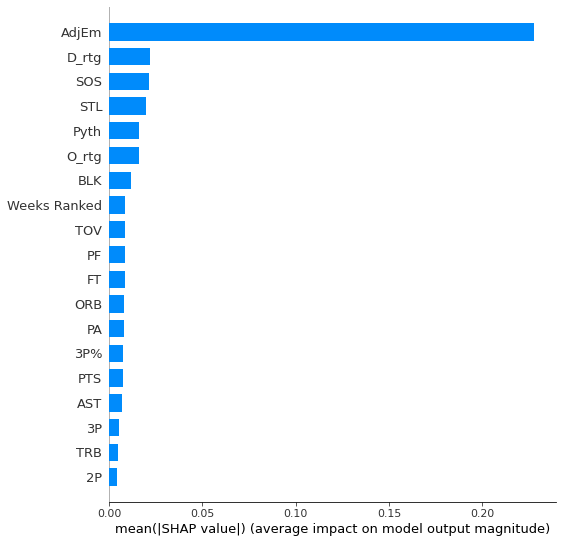

In [5]:
explainer_1 = shap.TreeExplainer(rf_sub)
shap_values_1 = explainer_1.shap_values(X_test_1)
shap_values_1
shap.summary_plot(shap_values_1, X_test_1, plot_type = "bar", title = "Hi")

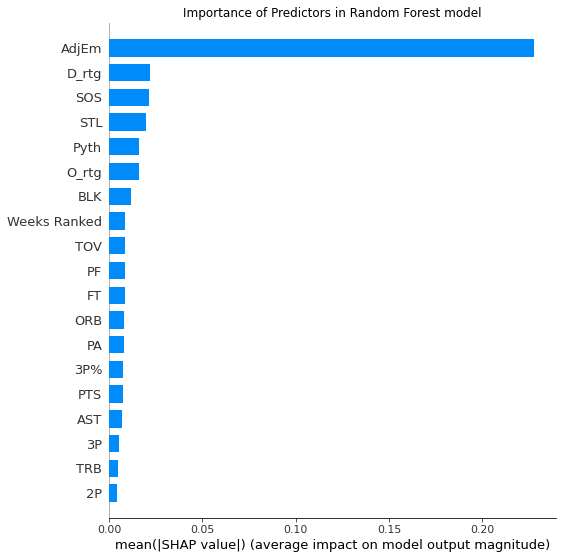

In [16]:
shap.summary_plot(shap_values_1, X_test_1, plot_type = "bar", show = False)
plt.title("Importance of Predictors in Random Forest model")
#plt.ylabel("Predictor")
plt.show()

In [279]:
'''
If every person in the United States filled out a completely unique bracket that was 
66.7 percent accurate, we'd expect to see a perfect bracket 366 years from now. 
You know, if March Madness is still happening in the year 2385.
'''


"\nIf every person in the United States filled out a completely unique bracket that was \n66.7 percent accurate, we'd expect to see a perfect bracket 366 years from now. \nYou know, if March Madness is still happening in the year 2385.\n"

In [286]:
binary = pd.read_pickle(f'binary_frame')

y = binary.iloc[:,-1]
X = binary.iloc[:,3:-1]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   train_size = .8,
                                                   random_state = 69)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 69)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=69)

In [288]:
predictions = rf.predict(X_test)

errors = abs(predictions - y_test)

errors.mean()


0.4059355090311987

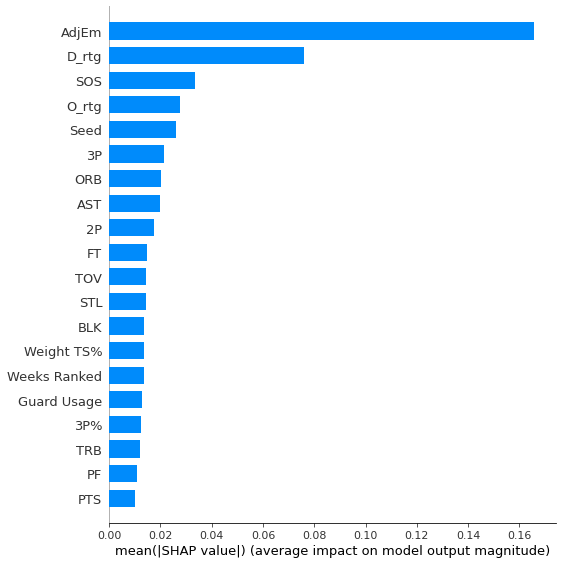

In [289]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap_values
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [ ]:
# Export as dot file
export_graphviz(estimator_limited, 
                out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [20]:
model2 = svm.SVC(kernel='linear')

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators'